In [5]:
# Setup Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rank_data = pd.read_csv("./Resources/collegeRanksCSV.csv")

In [11]:
rank_data.head()

,SCHOOL,2008,2009,2010,2011,2012,2013,2014,2015,AVG RANK,CHG 08 VS 15
0,Princeton,1,2,1,2,1,1,1,1,1.250,0
1,Harvard,2,1,1,1,1,1,2,2,1.375,0
2,Yale,3,3,3,3,3,3,3,3,3.000,0
3,Stanford,4,4,4,5,5,6,5,4,4.625,0
4,Columbia,9,8,8,4,4,4,4,4,5.625,5


In [15]:
school=rank_data['SCHOOL']
rank_08 = rank_data['2008']
rank_09 = rank_data['2009']
rank_10 = rank_data['2010']
rank_11 = rank_data['2011']
rank_12 = rank_data['2012']
rank_13 = rank_data['2013']
rank_14 = rank_data['2014']
rank_15 = rank_data['2015']
change = rank_data['CHG 08 VS 15']

Text(0.5, 0, 'School')

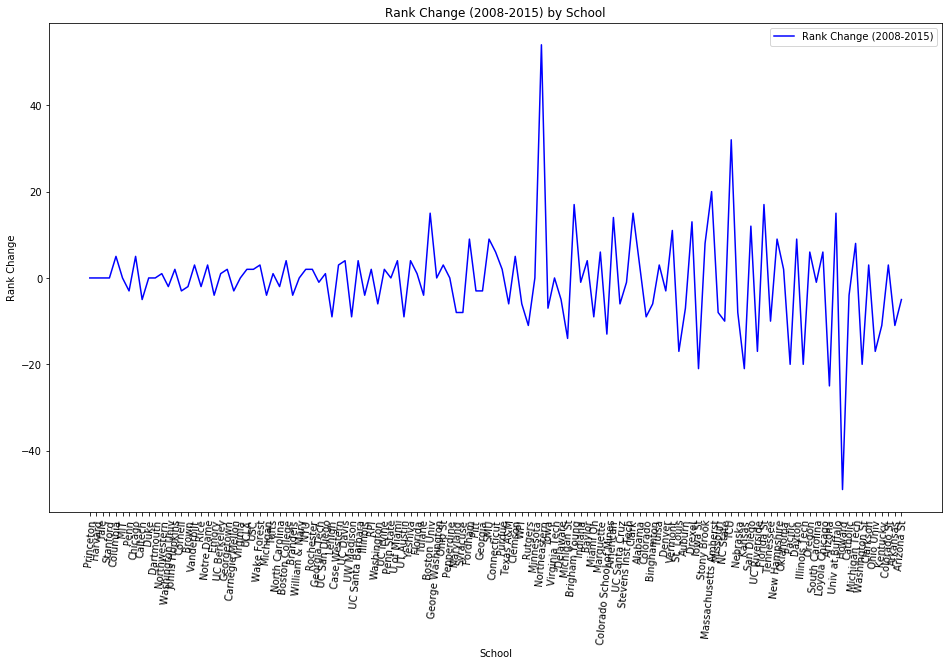

In [33]:
#Build Plot for Rank Change
rank_change= plt.plot(school, change, color="blue", label="Rank Change (2008-2015)" )
plt.legend()
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Change (2008-2015) by School")
plt.ylabel("Rank Change")
plt.xlabel("School")

In [20]:
#Northeastern
max(change)

54

In [25]:
#Howard University 
min(change)

-49

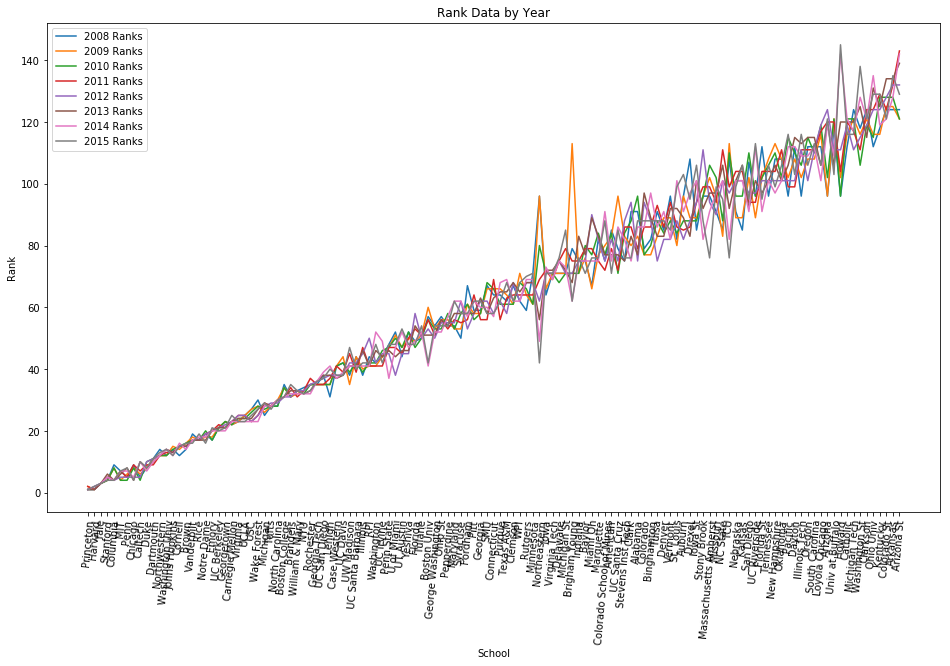

In [62]:
#Plotting Yearly Data
data_08= plt.plot(school, rank_08, label="2008 Ranks")
data_09= plt.plot(school, rank_09, label="2009 Ranks")
data_10= plt.plot(school, rank_10, label="2010 Ranks")
data_11= plt.plot(school, rank_11, label="2011 Ranks")
data_12= plt.plot(school, rank_12, label="2012 Ranks")
data_13= plt.plot(school, rank_13, label="2013 Ranks")
data_14= plt.plot(school, rank_14, label="2014 Ranks")
data_15= plt.plot(school, rank_15, label="2015 Ranks")


plt.legend()
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Data by Year")
plt.ylabel("Rank")


plt.xlabel("School")

plt.show()

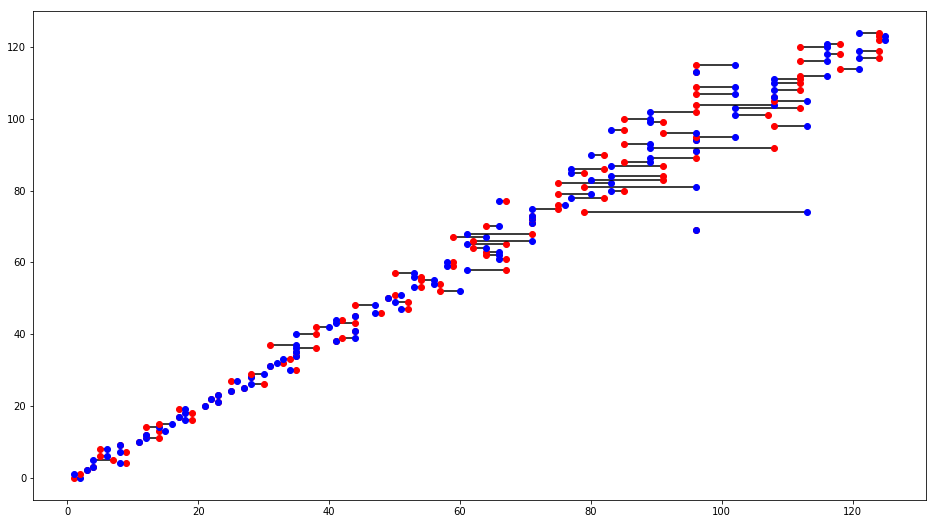

In [61]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111)

for i in list(range(len(school))):
    # Plot the line between dumbbells
    ax.plot([rank_08[i], rank_09[i]], [i, i], color='black')
    # Plot the dumbbells.
    ax.plot(rank_08[i], i, color='red', marker='o')
    ax.plot(rank_09[i], i, color='blue', marker='o')
    
# Adjust and show the plot
plt.rcParams["figure.figsize"] = [16,9]
plt.show()



In [66]:
#Plotting Yearly Data
year = ['2008','2009','2010','2011','2012','2013','2014','2015']
plt.xticks(computeTicks(year))
data_08= plt.plot(year, rank_08, label="2008 Ranks")
data_09= plt.plot(year, rank_09, label="2009 Ranks")
data_10= plt.plot(year, rank_10, label="2010 Ranks")
data_11= plt.plot(year, rank_11, label="2011 Ranks")
data_12= plt.plot(year, rank_12, label="2012 Ranks")
data_13= plt.plot(year, rank_13, label="2013 Ranks")
data_14= plt.plot(year, rank_14, label="2014 Ranks")
data_15= plt.plot(year, rank_15, label="2015 Ranks")


plt.legend(school)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Data by Year")
plt.ylabel("Rank")


plt.xlabel("School")

plt.show()

NameError: name 'computeTicks' is not defined